In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
sns.reset_defaults()

datatrooper_palette = [
    "#E6D3AD",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

plt.style.use('fivethirtyeight')
sns.set_palette(datatrooper_palette)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

sns.set_context("talk")
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
df = pd.read_csv("../datos/accidentes_2019.csv")

In [3]:
df.head()

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD
0,-75.596093,6.256489,709812,1674223,2019-06-09T00:00:00.000Z,12:30:00 p. m.,9,2019,Choque,CL 47 CR 78,...,El Velódromo,Laureles Estadio,Tramo de via,DOMINGO,6,JUNIO,831924.55,1183834.57,-75.596093,6.256489
1,-75.583161,6.250155,709813,1675562,2019-06-21T00:00:00.000Z,6:50:00 p. m.,21,2019,Choque,CR 65 CL 45,...,Naranjal,Laureles Estadio,Lote o Predio,VIERNES,6,JUNIO,833355.96,1183133.87,-75.583161,6.250155
2,-75.563856,6.250657,709814,1661788,2019-02-27T00:00:00.000Z,8:50:00 a. m.,27,2019,Volcamiento,CR 46 CL 53,...,La Candelaria,La Candelaria,Tramo de via,MIÉRCOLES,2,FEBRERO,835492.78,1183189.30,-75.563856,6.250657
3,-75.576757,6.268025,709815,1675911,2019-06-25T00:00:00.000Z,7:00:00 a. m.,25,2019,Choque,CR 65 CL 67,...,Caribe,Castilla,Tramo de via,MARTES,6,JUNIO,834064.81,1185110.49,-75.576757,6.268025
4,-75.571897,6.202827,709816,1673388,2019-06-04T00:00:00.000Z,11:30:00 a. m.,4,2019,Choque,CR 43 A CL 1 A Sur,...,Alejandría,El Poblado,Tramo de via,MARTES,6,JUNIO,834602.62,1177898.70,-75.571897,6.202827


In [4]:
df_choques = df[df["CLASE"]=="Choque"]
df_choques.loc[:,"HORA"] = df_choques.loc[:,"HORA"].str.replace(".", "")
df_choques.loc[:,"HORA"] = df_choques.loc[:,"HORA"].str.replace(" ", "")
df_choques.loc[:,'HORA'] =  pd.to_datetime(df_choques.loc[:,"HORA"])
# df_choques.loc[:,'HORA'] =  df_choques.loc[:,'HORA'].dt.time
df_choques.loc[:,"FECHA"] = pd.to_datetime(df_choques.loc[:,"FECHA"])
df_choques.loc[:,"FECHA_norm"] = df_choques.loc[:,"FECHA"].dt.strftime('%m-%d')

df_choques["SEMANA"] = df_choques["FECHA"].dt.week
df_choques["MES_NOMBRE"] = df_choques["MES_NOMBRE"].str.strip()
df_choques.head()

/home/davinchi/Documents/Projects/Datatrooper/venv/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/davinchi/Documents/Projects/Datatrooper/venv/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/davinchi/Documents/Projects/Datatrooper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD,FECHA_norm,SEMANA
0,-75.596093,6.256489,709812,1674223,2019-06-09 00:00:00+00:00,2020-03-27 12:30:00,9,2019,Choque,CL 47 CR 78,...,Tramo de via,DOMINGO,6,JUNIO,831924.55,1183834.57,-75.596093,6.256489,06-09,23
1,-75.583161,6.250155,709813,1675562,2019-06-21 00:00:00+00:00,2020-03-27 18:50:00,21,2019,Choque,CR 65 CL 45,...,Lote o Predio,VIERNES,6,JUNIO,833355.96,1183133.87,-75.583161,6.250155,06-21,25
3,-75.576757,6.268025,709815,1675911,2019-06-25 00:00:00+00:00,2020-03-27 07:00:00,25,2019,Choque,CR 65 CL 67,...,Tramo de via,MARTES,6,JUNIO,834064.81,1185110.49,-75.576757,6.268025,06-25,26
4,-75.571897,6.202827,709816,1673388,2019-06-04 00:00:00+00:00,2020-03-27 11:30:00,4,2019,Choque,CR 43 A CL 1 A Sur,...,Tramo de via,MARTES,6,JUNIO,834602.62,1177898.70,-75.571897,6.202827,06-04,23
5,-75.576737,6.207613,709817,1666474,2019-04-05 00:00:00+00:00,2020-03-27 12:20:00,5,2019,Choque,CR 48 CL 1,...,Tramo de via,VIERNES,4,ABRIL,834066.86,1178428.04,-75.576737,6.207613,04-05,14


In [5]:
df_choques["MES_NOMBRE"].unique()

array(['JUNIO', 'ABRIL', 'FEBRERO', 'MAYO', 'MARZO', 'ENERO',
       'SEPTIEMBRE', 'JULIO', 'AGOSTO', 'OCTUBRE', 'NOVIEMBRE',
       'DICIEMBRE'], dtype=object)

In [6]:
muertos_marzo = df_choques[((df_choques["MES_NOMBRE"] == "MARZO") & 
                (df_choques["GRAVEDAD"] == "MUERTO"))].shape[0]

num_acc = df_choques[((df_choques["FECHA"] > "2019-03-20") & (df_choques["FECHA"] < "2019-03-28"))].shape[0]
num_acc

502

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

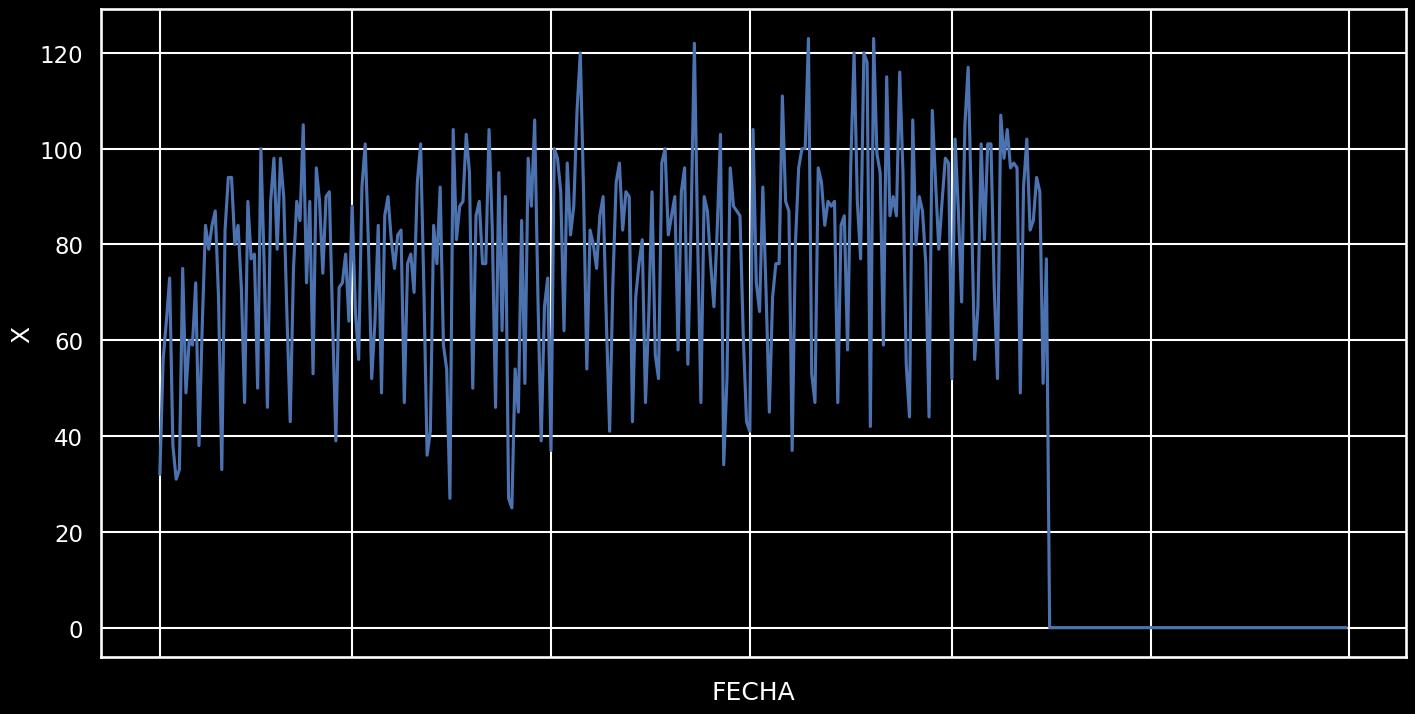

In [10]:
fig = plt.figure(figsize=(15,8))
choques_fecha = df_choques.groupby(df_choques.loc[:,"FECHA"].dt.date).count().loc[:,"X"].reset_index()
choques_fecha
c = sns.lineplot(x = "FECHA", y="X", data=choques_fecha, palette = datatrooper_palette)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

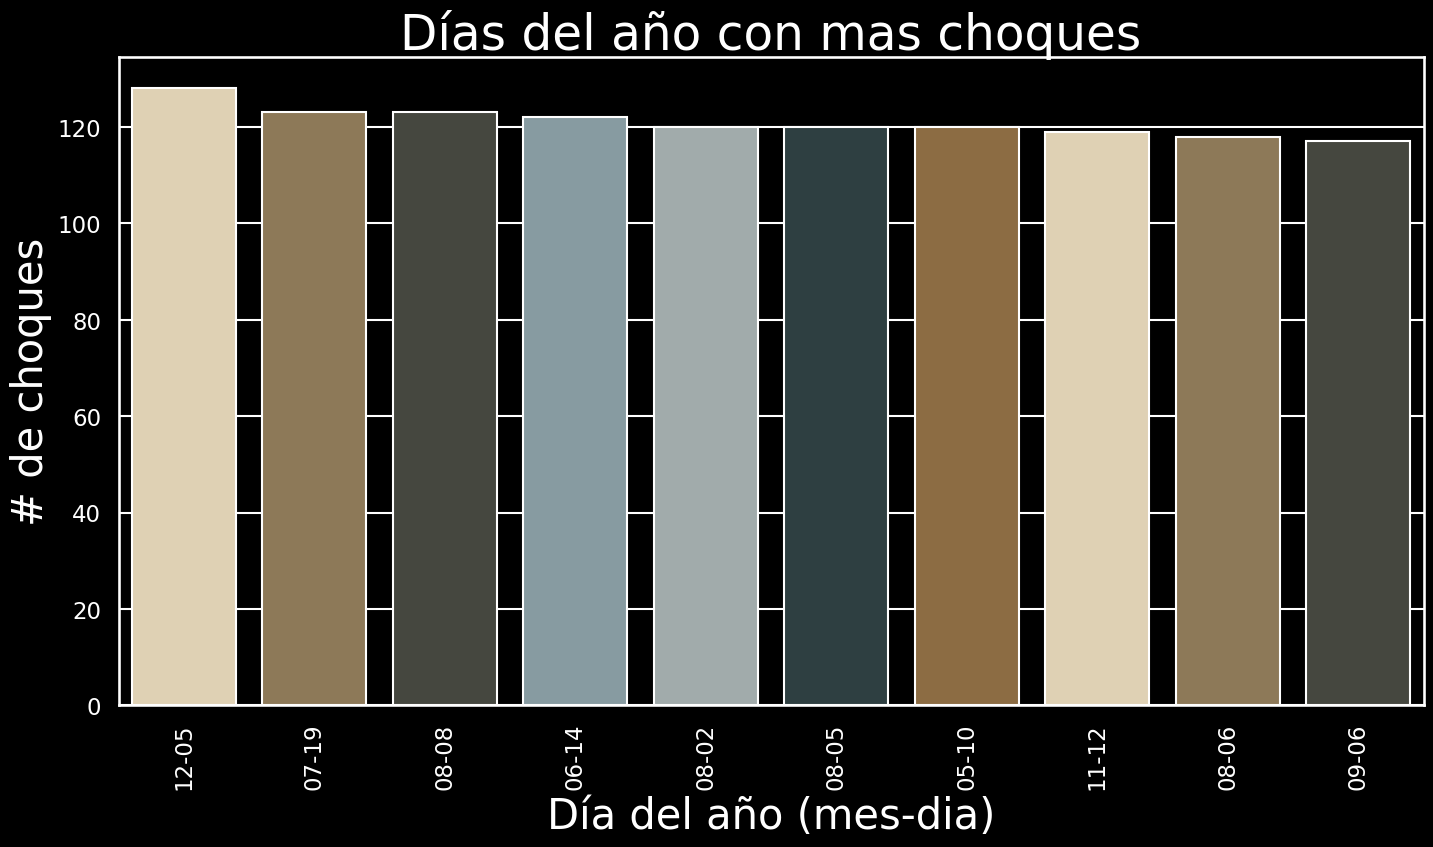

In [36]:
fig = plt.figure(figsize=(15,8))
c = sns.countplot(x="FECHA_norm", data=df_choques, 
                  order=df_choques["FECHA_norm"].value_counts().iloc[:10].index,
                  palette = datatrooper_palette)
c.set_xlabel("Día del año (mes-dia)",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_title("Días del año con mas choques", fontsize=35)
plt.show()

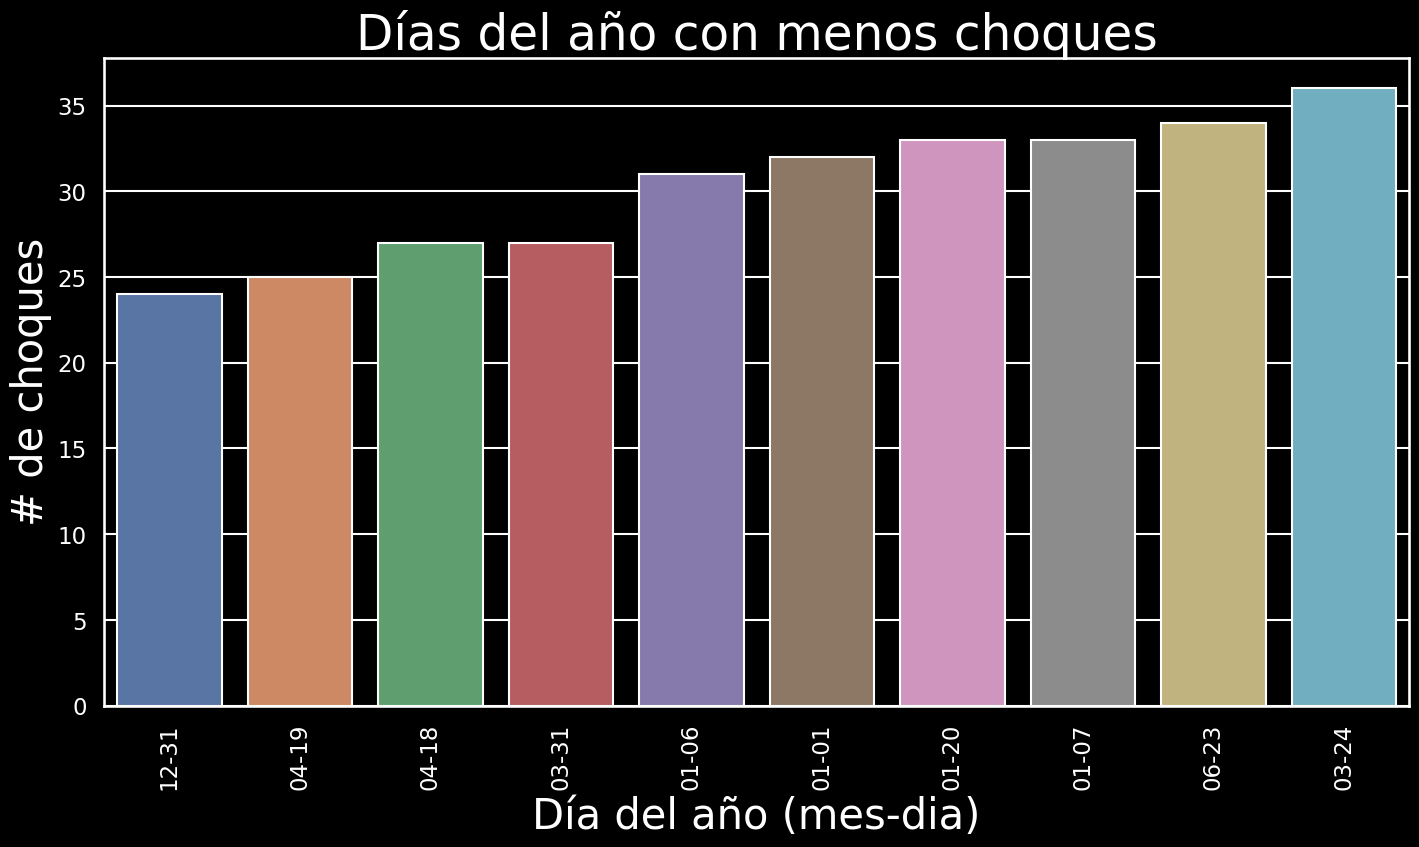

In [37]:
fig = plt.figure(figsize=(15,8))
c = sns.countplot(x="FECHA_norm", data=df_choques, order=df_choques["FECHA_norm"].value_counts(ascending = True).iloc[:10].index)
c.set_xlabel("Día del año (mes-dia)",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_title("Días del año con menos choques", fontsize=35)
plt.show()

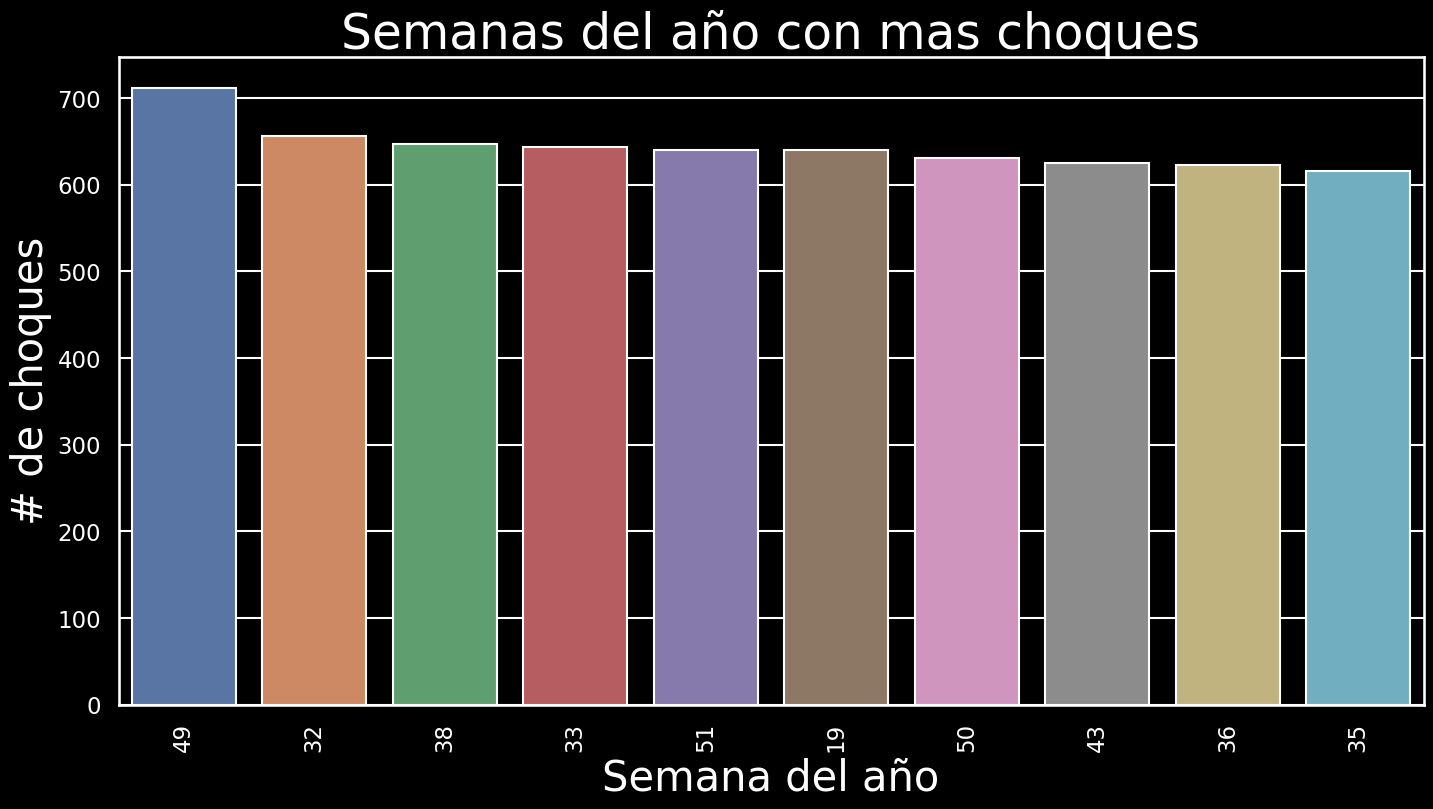

In [38]:
fig = plt.figure(figsize=(15,8))
df_choques_semanas = df_choques.copy()

c = sns.countplot(x="SEMANA", data=df_choques, order=df_choques["SEMANA"].value_counts().iloc[:10].index)
c.set_xlabel("Semana del año",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_title("Semanas del año con mas choques", fontsize=35)
plt.show()

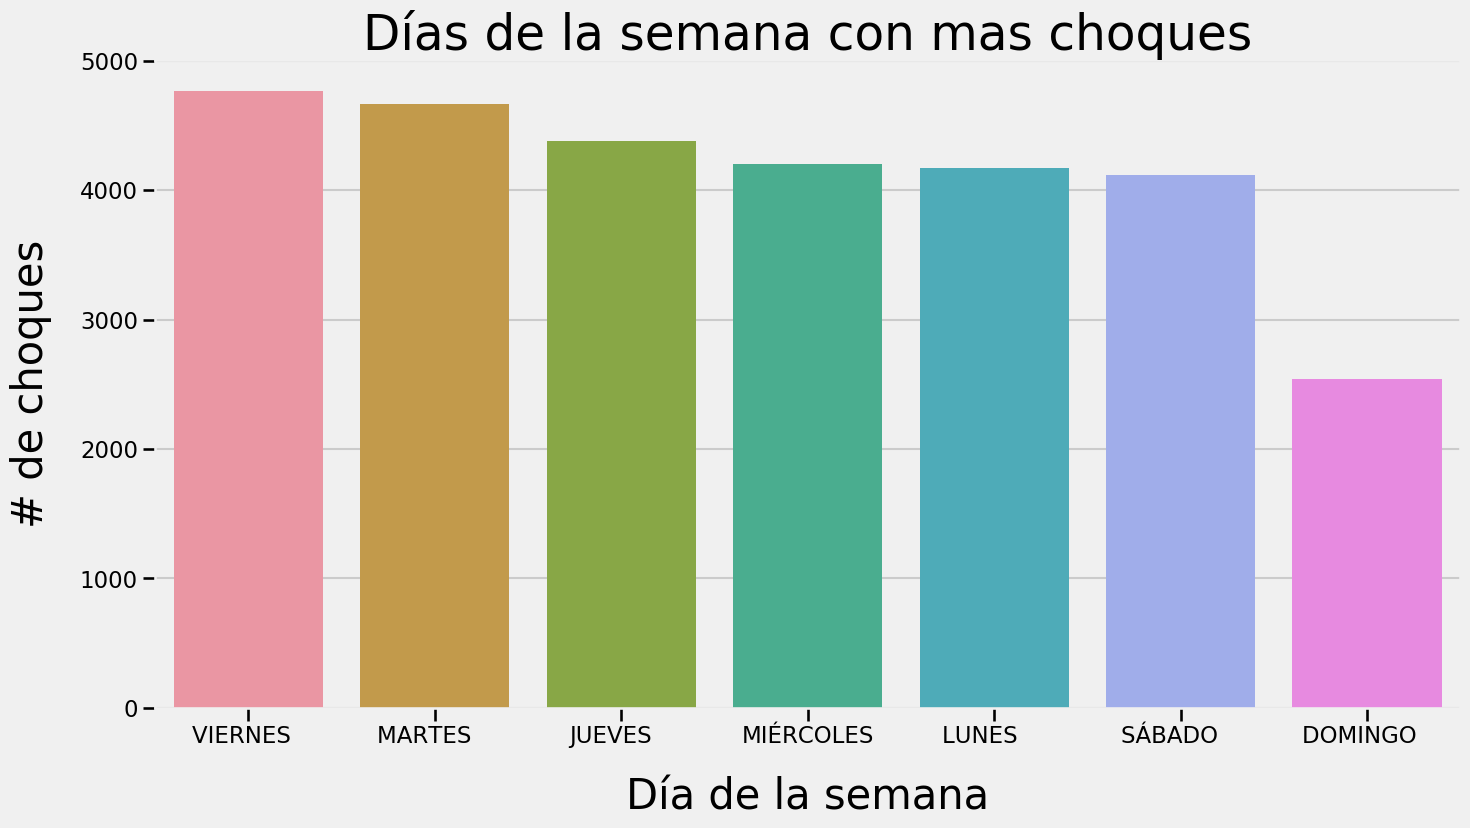

In [80]:
fig = plt.figure(figsize=(15,8))
c = sns.countplot(x="DIA_NOMBRE", data=df_choques,  order = df_choques['DIA_NOMBRE'].value_counts().index)
c.set_xlabel("Día de la semana",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Días de la semana con mas choques", fontsize=35)
plt.show()

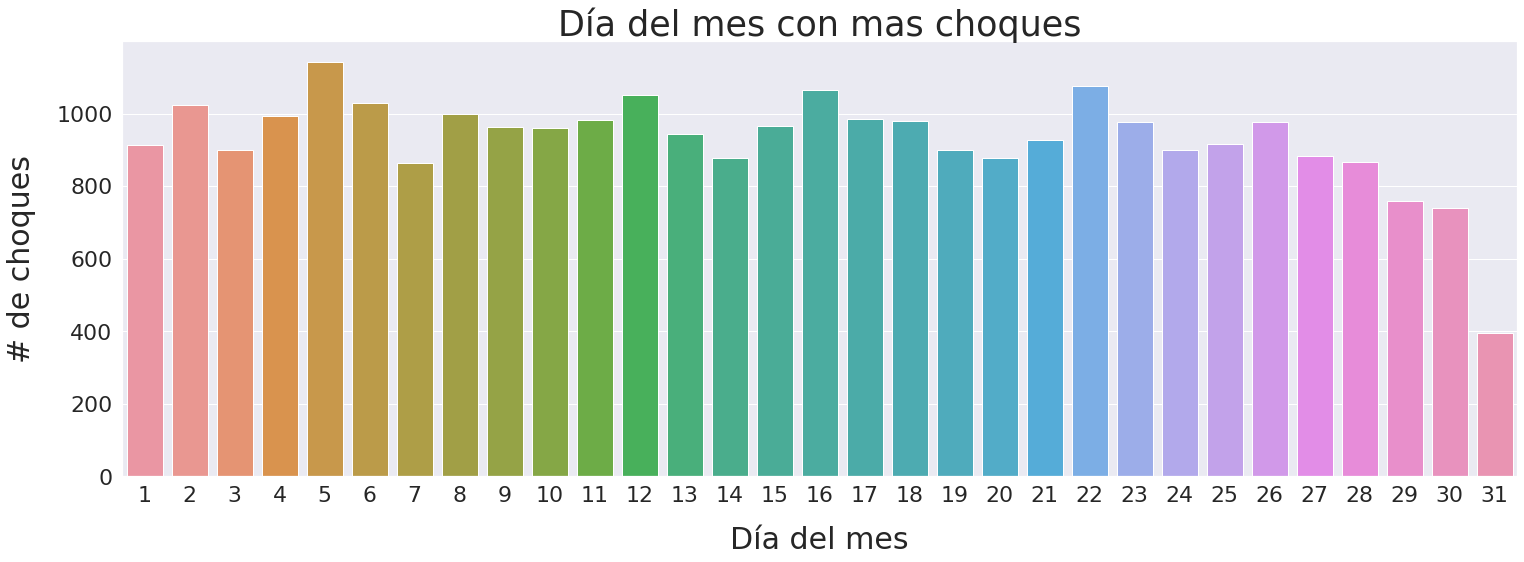

In [10]:
fig = plt.figure(figsize=(25,8))
sns.set(font_scale = 2)
c = sns.countplot(x="DIA", data=df_choques)
c.set_xlabel("Día del mes",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Día del mes con mas choques", fontsize=35)
plt.show()

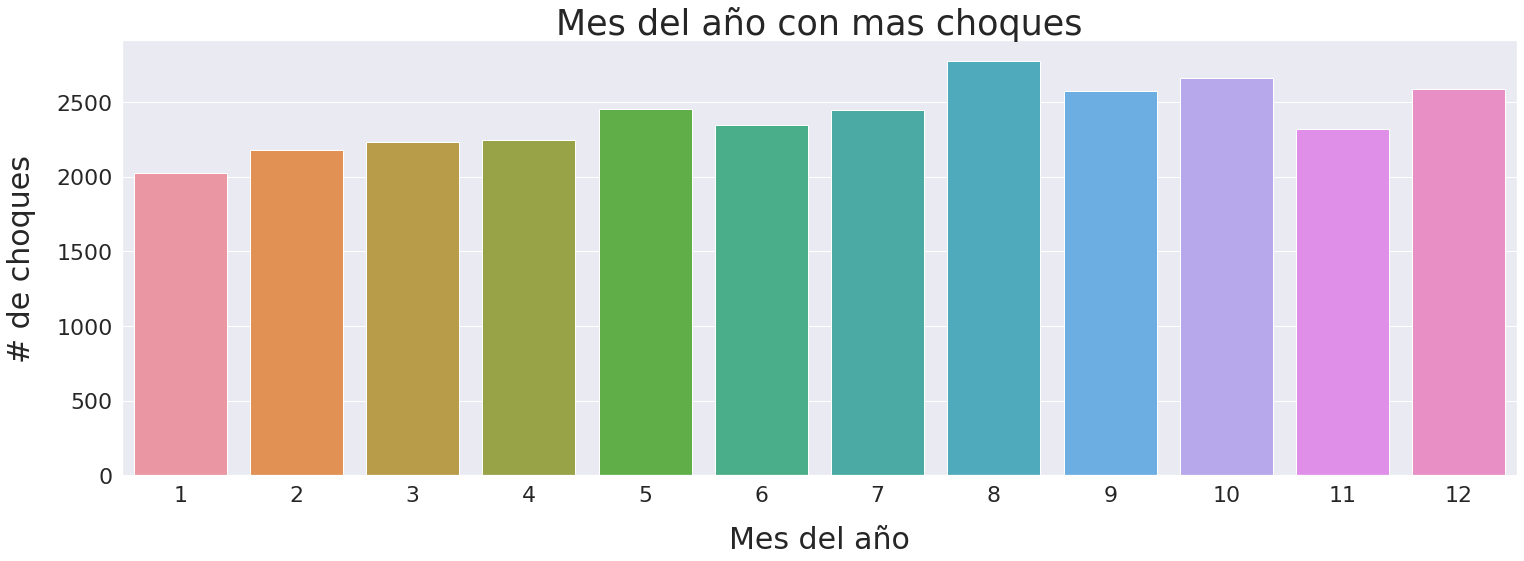

In [11]:
fig = plt.figure(figsize=(25,8))
sns.set(font_scale = 2)
c = sns.countplot(x="MES", data=df_choques)
c.set_xlabel("Mes del año",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Mes del año con mas choques", fontsize=35)
plt.show()

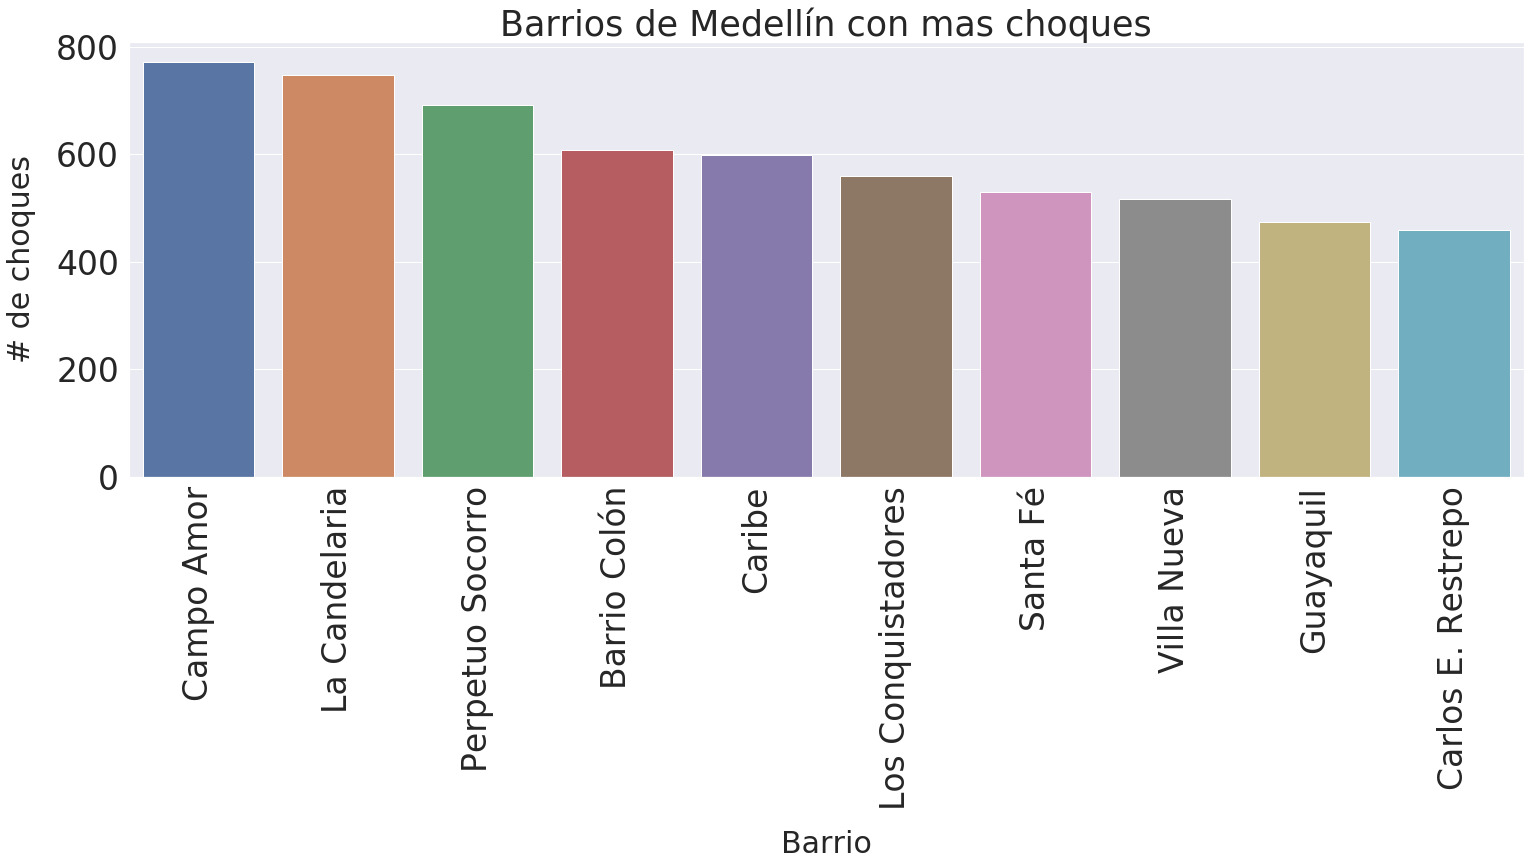

In [12]:
fig = plt.figure(figsize=(25,8))
sns.set(font_scale = 3)
c = sns.countplot(x="BARRIO", data=df_choques, order=df_choques["BARRIO"].value_counts().iloc[:10].index)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_xlabel("Barrio",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Barrios de Medellín con mas choques", fontsize=35)
plt.show()

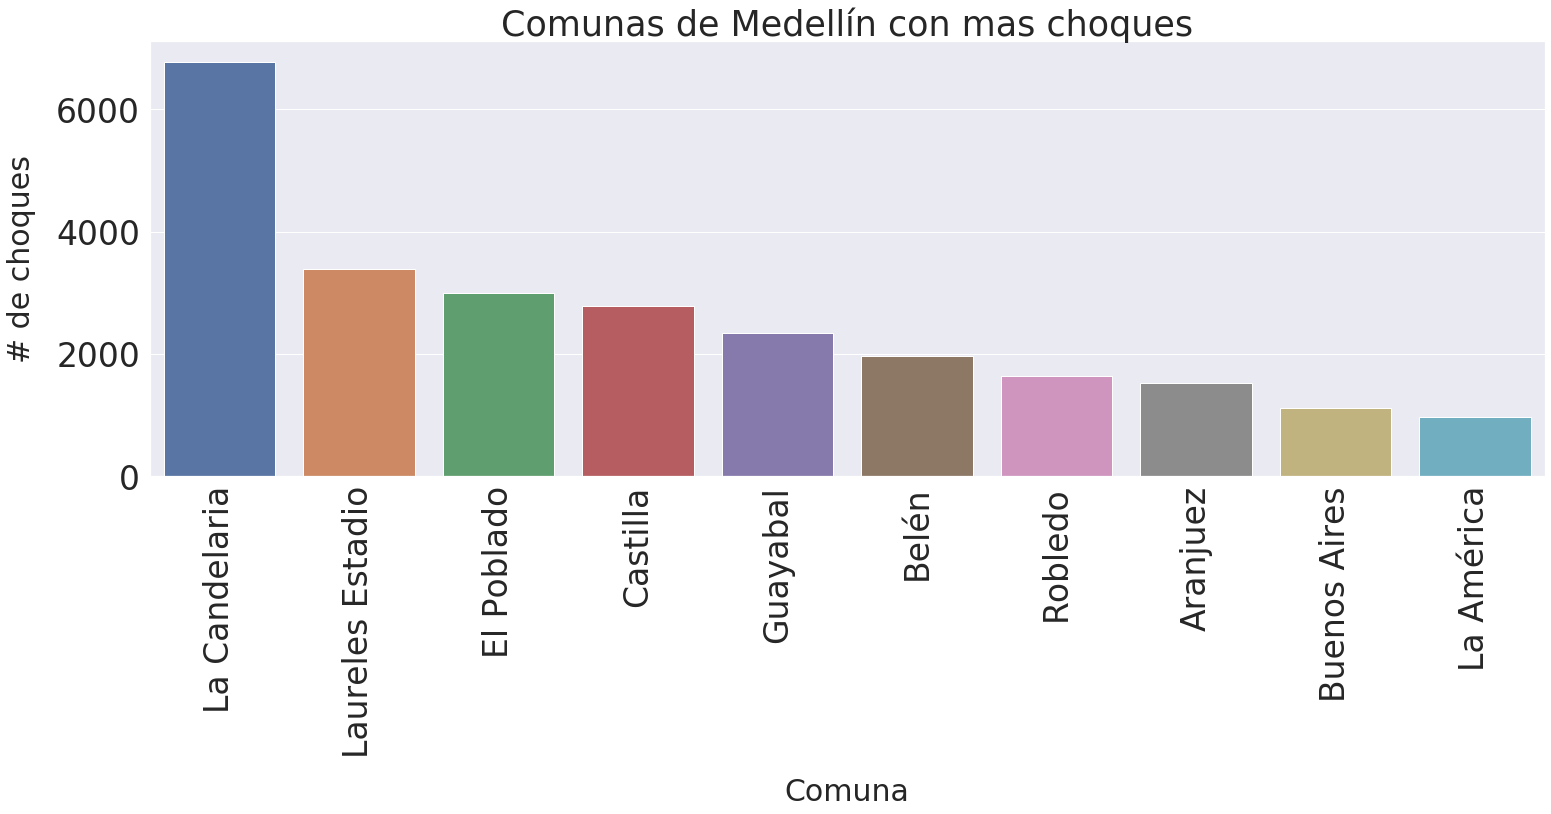

In [13]:
fig = plt.figure(figsize=(25,8))
sns.set(font_scale = 3)
c = sns.countplot(x="COMUNA", data=df_choques, order=df_choques["COMUNA"].value_counts().iloc[:10].index)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_xlabel("Comuna",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Comunas de Medellín con mas choques", fontsize=35)
plt.show()

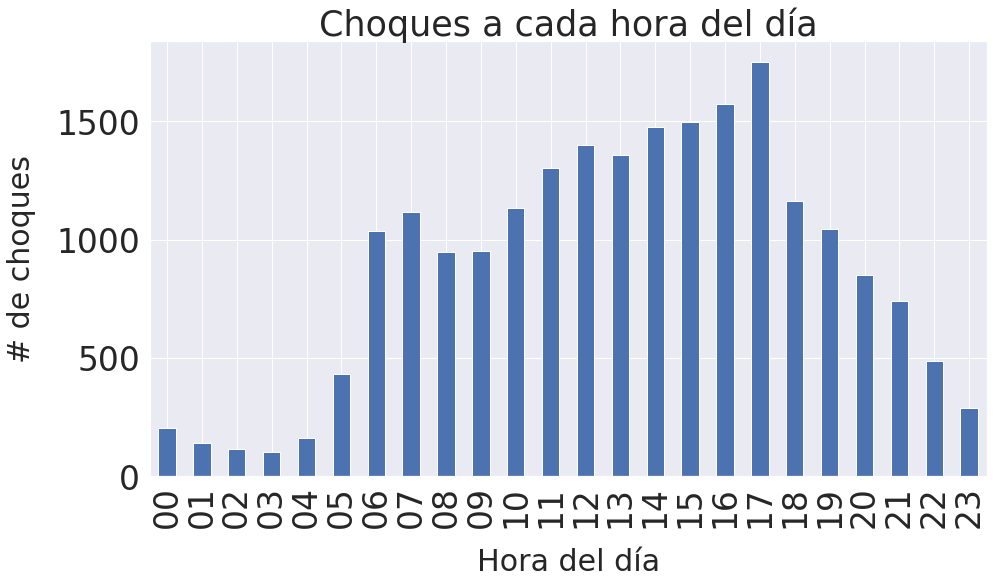

In [14]:
df_choques_date = df_choques.copy()
fig = plt.figure(figsize=(15,8))
sns.set(font_scale = 3)
df_choques_date.set_index('HORA', drop=False, inplace=True)
df_30 = df_choques_date.groupby(pd.Grouper(freq='60Min')).count()["X"]
df_30.index = df_30.index.floor('T').time
df_30.index = df_30.index.map(lambda x: str(x)[:-6])
t = df_30.plot(kind='bar')
t.set_xlabel("Hora del día",fontsize=30)
t.set_ylabel("# de choques",fontsize=30)
t.set_title("Choques a cada hora del día", fontsize=35)
plt.show()